In [40]:
from ecmwfapi import ECMWFDataServer
    
# server = ECMWFDataServer()
    
# server.retrieve({
#     'stream'    : "oper",
#     'levtype'   : "sfc",
#     #               U,       V
#     'param'     : "166.128/167.128",
#     'dataset'   : "interim",
#     'step'      : "0",
#     'grid'      : "0.75/0.75",
#     'time'      : "00/06/12/18",
# #     'date'      : "2000-10-01/to/2013-09-30",
#     'date'      : "2000-10-01/to/2005-09-30",
#     'type'      : "an",
#     'class'     : "ei",
#     'format'    : "netcdf",
#     'target'    : "../data/interim_2014-07-01to2014-07-31_00061218.nc"
#  })


#!/usr/bin/env python
from ecmwfapi import ECMWFDataServer
    
server = ECMWFDataServer()
    
server.retrieve({
    'stream'    : "oper",
    'levtype'   : "sfc",
    'param'     : "165.128/166.128",
    'dataset'   : "interim",
    'step'      : "0",
    'grid'      : "0.75/0.75",
    'time'      : "00/06/12/18",
# #     'date'      : "2000-10-01/to/2013-09-30",
    'type'      : "an",
    'class'     : "ei",
     # optionally restrict area to Europe (in N/W/S/E).
    'area'      : "57.91813278198242/-139.0548095703125/18.13629150390625/-56.9451904296875",
    'format'    : "netcdf",
    'target'    : "interim_2014-07-01to2014-07-31_00061218.nc"
 })

2021-03-30 22:25:46 ECMWF API python library 1.6.1
2021-03-30 22:25:46 ECMWF API at https://api.ecmwf.int/v1
2021-03-30 22:25:46 Welcome Nic Annau
2021-03-30 22:25:49 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2021-03-30 22:25:49 Request submitted
2021-03-30 22:25:49 Request id: 606407ddc92085c69d41a27e
2021-03-30 22:25:49 Request is submitted
2021-03-30 22:25:51 Request is active
Calling 'nice mars /tmp/20210331-0520/5c/tmp-_mars3junws.req'
mars - WARN -
mars - WARN - From 29 January 2019 10AM (UTC) MARS uses the interpolation
mars - WARN - provided by the MIR library. For more details, see
mars - WARN - https://confluence.ecmwf.int/display/UDOC/MARS+interpolation+with+MIR
mars - WARN -
MIR environment variables:
MIR_CACHE_PATH=/data/ec_coeff
mars - INFO   - 20210331.052550 - Welcome to MARS
mars - INFO   - 20210331.052550 - MARS Client bundle version: 6.28.6.1
mars - INFO   - 20210331.052550 - MARS Client

In [42]:
# Check that it's loaded:
import xarray as xr
ds = xr.open_dataset("interim_2014-07-01to2014-07-31_00061218.nc")

In [43]:
float(ds.longitude.min()), float(ds.longitude.max())

(-139.05499267578125, -57.30400085449219)

In [46]:
#     'area'      : "18.13629150390625/57.91813278198242/-56.9451904296875/-139.0548095703125",
ds

<xarray.Dataset>
Dimensions:    (latitude: 54, longitude: 110, time: 120)
Coordinates:
  * longitude  (longitude) float32 -139.055 -138.305 ... -58.05401 -57.304
  * latitude   (latitude) float32 57.887 57.137 56.387 ... 19.637 18.887 18.137
  * time       (time) datetime64[ns] 2000-10-01 ... 2000-10-30T18:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-03-31 05:25:53 GMT by grib_to_netcdf-2.21.0: grib_to_n...

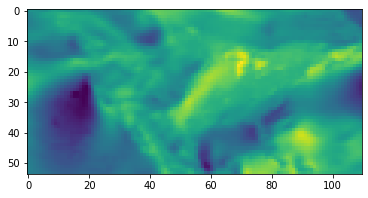

In [45]:
import matplotlib.pyplot as plt
plt.imshow(ds["v10"][0, ...])